In [49]:
import pandas as pd
import numpy as np

In [50]:
df=pd.read_csv('/content/mapped_features.csv')

In [51]:
df.head()

,likes,inferred company,has_media,hour,day_of_week,word_count,char_count,polarity,subjectivity,entities,...,loc_mentions,money_mentions,percent_mentions,product_mentions,event_mentions,law_mentions,language_mentions,art_mentions,syllable_count,sentence_count
0,1,tim hortons,True,0,Saturday,29,181,0.1750,0.325000,"['DATE', 'TIME', 'NORP', 'PERSON']",...,0,0,0,0,0,0,0,0,42,3
1,2750,independent,True,10,Saturday,10,73,0.0000,0.000000,[],...,0,0,0,0,0,0,0,0,19,1
2,57,cbc,True,19,Tuesday,14,104,-0.1000,0.100000,['NORP'],...,0,0,0,0,0,0,0,0,33,1
3,152,williams,True,11,Thursday,22,140,0.5000,0.900000,"['ORDINAL', 'LOC', 'DATE', 'GPE']",...,1,0,0,0,0,0,0,0,36,3
4,41,independent,True,14,Friday,26,199,0.0625,0.083333,"['DATE', 'CARDINAL']",...,0,0,0,0,0,0,0,0,51,3


In [52]:
# One-hot encode the 'day_of_week' column
day_dummies = pd.get_dummies(df['day_of_week'], prefix='day').astype(int)

# Concatenate with original DataFrame
df = pd.concat([df, day_dummies], axis=1)


In [53]:
# One-hot encode the 'day_of_week' column
day_dummies = pd.get_dummies(df['has_media'], prefix='has_media').astype(int)

# Concatenate with original DataFrame
df = pd.concat([df, day_dummies], axis=1)


In [54]:
newdf=df.drop(['inferred company','day_of_week','entities','has_media'],axis =1)
newdf.head()

,likes,hour,word_count,char_count,polarity,subjectivity,org_mentions,place_mentions,date_mentions,time_mentions,...,syllable_count,sentence_count,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,has_media_True
0,1,0,29,181,0.1750,0.325000,0,0,1,1,...,42,3,0,0,1,0,0,0,0,1
1,2750,10,10,73,0.0000,0.000000,0,0,0,0,...,19,1,0,0,1,0,0,0,0,1
2,57,19,14,104,-0.1000,0.100000,0,0,0,0,...,33,1,0,0,0,0,0,1,0,1
3,152,11,22,140,0.5000,0.900000,0,1,1,0,...,36,3,0,0,0,0,1,0,0,1
4,41,14,26,199,0.0625,0.083333,0,0,1,0,...,51,3,1,0,0,0,0,0,0,1


In [55]:
X = newdf.copy()
y = X.pop("likes")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

In [56]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

,MI Scores
word_count,0.075629
syllable_count,0.058862
hour,0.008210
place_mentions,0.004442
day_Monday,0.001603
time_mentions,0.000541
product_mentions,0.000148
language_mentions,0.000000
day_Friday,0.000000


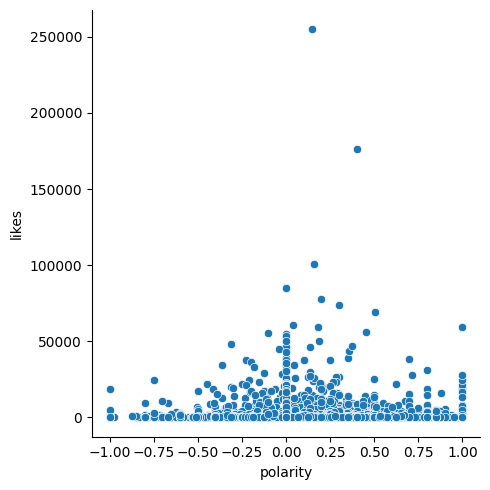

In [57]:
import seaborn as sns
sns.relplot(x="polarity", y="likes", data=newdf);

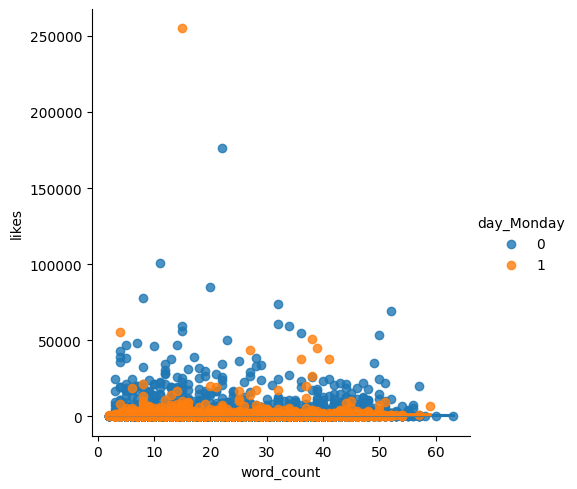

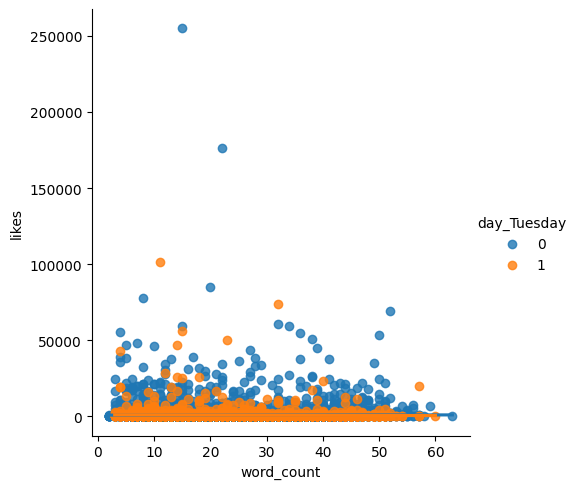

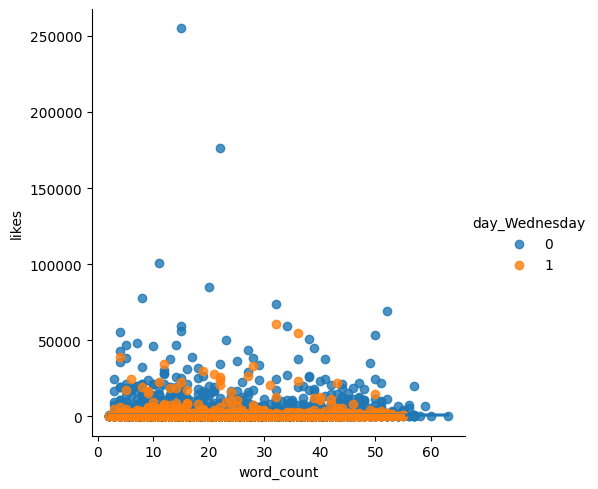

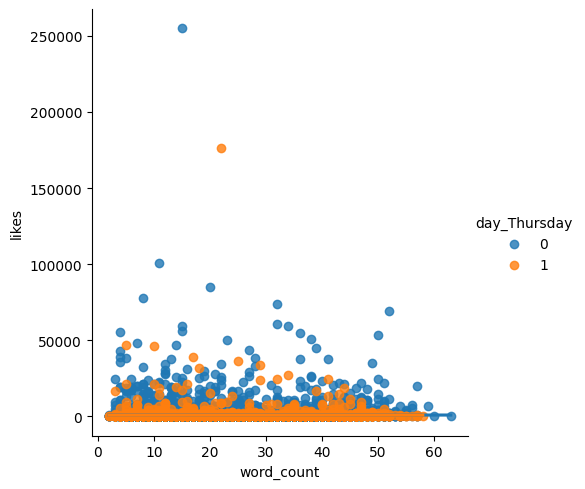

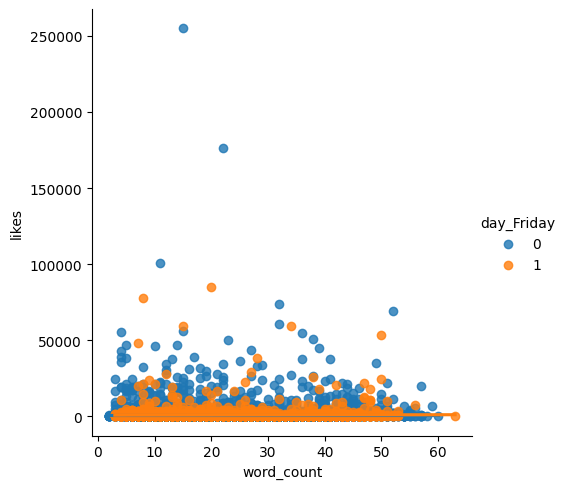

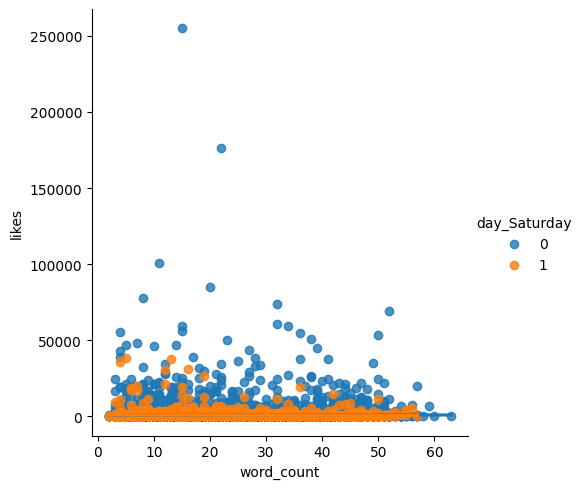

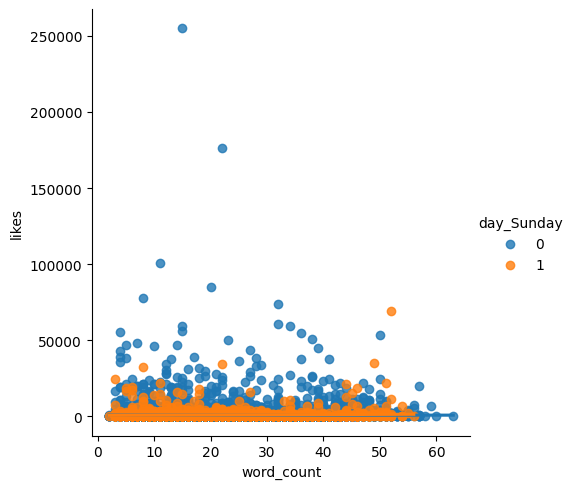

In [58]:
sns.lmplot(x="word_count", y="likes", hue="day_Monday", data=newdf);
sns.lmplot(x="word_count", y="likes", hue="day_Tuesday", data=newdf);
sns.lmplot(x="word_count", y="likes", hue="day_Wednesday", data=newdf);
sns.lmplot(x="word_count", y="likes", hue="day_Thursday", data=newdf);
sns.lmplot(x="word_count", y="likes", hue="day_Friday", data=newdf);
sns.lmplot(x="word_count", y="likes", hue="day_Saturday", data=newdf);
sns.lmplot(x="word_count", y="likes", hue="day_Sunday", data=newdf);

In [59]:
newdf['sin_time']=np.sin(2*(np.pi)*newdf['hour']/1440)

In [60]:
newdf['cos_time']=np.cos(2*(np.pi)*newdf['hour']/1440)

In [61]:
newdf['sentiment']=newdf['polarity']*newdf['subjectivity']

In [63]:
newdf['flesch_score']=206.835-1.015*(newdf['word_count']/newdf['sentence_count'])-84.6*(newdf['syllable_count']/newdf['word_count'])

In [64]:
newdf.head()

,likes,hour,word_count,char_count,polarity,subjectivity,org_mentions,place_mentions,date_mentions,time_mentions,...,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,has_media_True,sin_time,cos_time,sentiment,flesch_score
0,1,0,29,181,0.1750,0.325000,0,0,1,1,...,1,0,0,0,0,1,0.000000,1.000000,0.056875,74.499195
1,2750,10,10,73,0.0000,0.000000,0,0,0,0,...,1,0,0,0,0,1,0.043619,0.999048,0.000000,35.945000
2,57,19,14,104,-0.1000,0.100000,0,0,0,0,...,0,0,0,1,0,1,0.082808,0.996566,-0.010000,-6.789286
3,152,11,22,140,0.5000,0.900000,0,1,1,0,...,0,0,1,0,0,1,0.047978,0.998848,0.450000,60.955303
4,41,14,26,199,0.0625,0.083333,0,0,1,0,...,0,0,0,0,0,1,0.061049,0.998135,0.005208,32.092179


In [65]:
X = newdf.copy()
y = X.pop("likes")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

,MI Scores
flesch_score,0.116436
sentence_count,0.059310
subjectivity,0.026901
hour,0.008212
percent_mentions,0.004624
time_mentions,0.002262
loc_mentions,0.000878
art_mentions,0.000202
law_mentions,0.000000
day_Friday,0.000000


In [66]:
newdf.to_csv("mapped_and_added_features.csv", index=False)
from google.colab import files
files.download("mapped_and_added_features.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>